In [17]:
from __future__ import print_function
import os
import numpy as np
import seaborn as sns
import matplotlib as plt
import keras

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.utils import to_categorical


from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

## **loading the CIFAR-10 dataset into four variables**

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## **Information about the shapes and sizes of the training and test datasets**

In [19]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
50000 train samples
10000 test samples


## **Setting up parameters for training our model**

In [20]:
batch_size = 32
num_classes = 10
epochs = 10

## **Visualizing Random Samples from CIFAR-10 Classes**

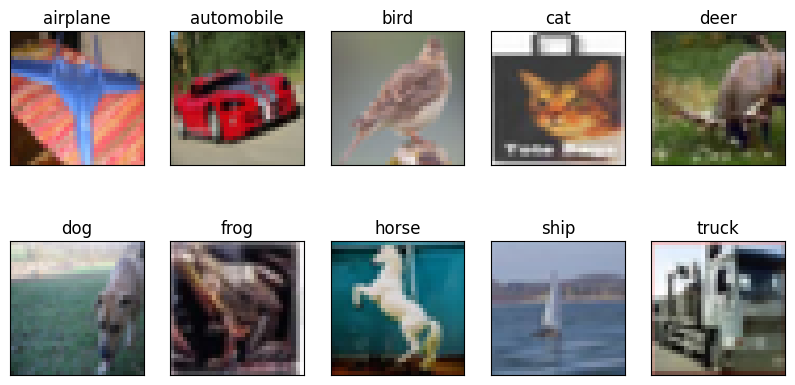

In [21]:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse','ship', 'truck']

fig = plt.figure(figsize = (10,5))
for i in range(num_classes):
  idx = np.where(y_train[:]==i)[0]
  ax = fig.add_subplot(2,5,1+i, xticks=[], yticks=[])
  features_idx = x_train[idx,::]
  img_num =np.random.randint(features_idx.shape[0])
  im = (features_idx[img_num,::])
  ax.set_title(class_names[i])
  plt.imshow(im)
plt.show()

## **Data Preprocessing: Normalization and One-Hot Encoding**

In [22]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test,num_classes)

## **Convolutional Neural Network (CNN) Model**

In [23]:
model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, kernel_size=3, kernel_initializer='he_normal', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size= 3, kernel_initializer= 'he_normal', strides=1, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128 , kernel_size= 3, kernel_initializer= 'he_normal', strides = 1, padding ='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, kernel_size=3, kernel_initializer= 'he_normal', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((4,4)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, kernel_initializer='glorot_uniform', activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)       

## **Training Convolutional Neural Network (CNN) Model**

In [24]:
earlystopper = EarlyStopping(monitor= 'val_acc', patience = 5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor ='val_acc', factor=0.5, patience =5, verbose = 1, mode= 'max', min_lr=0.00001)

checkpointer = ModelCheckpoint('best_model.h5', monitor= 'val_acc', verbose = 1, save_best_only= True, save_weights_only=True)

history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=32,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[earlystopper, reduce_lr, checkpointer],
                    validation_data=(x_train, y_train))

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.6537 - accuracy: 0.4059

1563/1563 [==============================] - 22s 12ms/step - loss: 1.6537 - accuracy: 0.4059 - val_loss: 1.3426 - val_accuracy: 0.5149 - lr: 0.0010
Epoch 2/10
1558/1563 [============================>.] - ETA: 0s - loss: 1.1628 - accuracy: 0.5889

1563/1563 [==============================] - 17s 11ms/step - loss: 1.1622 - accuracy: 0.5890 - val_loss: 0.9708 - val_accuracy: 0.6616 - lr: 0.0010
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.9542 - accuracy: 0.6654

1563/1563 [==============================] - 17s 11ms/step - loss: 0.9542 - accuracy: 0.6654 - val_loss: 0.8650 - val_accuracy: 0.6983 - lr: 0.0010
Epoch 4/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.8237 - accuracy: 0.7150

1563/1563 [==============================] - 17s 11ms/step - loss: 0.8237 - accuracy: 0.7150 - val_loss: 0.6553 - val_accuracy: 0.7722 - lr: 0.0010
Epoch 5/10
1563/1563 [==============================] - ETA: 0s - loss: 0.7349 - accuracy: 0.7455

1563/1563 [==============================] - 17s 11ms/step - loss: 0.7349 - accuracy: 0.7455 - val_loss: 0.5812 - val_accuracy: 0.7983 - lr: 0.0010
Epoch 6/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.6709 - accuracy: 0.7659

1563/1563 [==============================] - 18s 11ms/step - loss: 0.6708 - accuracy: 0.7660 - val_loss: 0.5795 - val_accuracy: 0.7997 - lr: 0.0010
Epoch 7/10
1563/1563 [==============================] - ETA: 0s - loss: 0.6206 - accuracy: 0.7854

1563/1563 [==============================] - 18s 11ms/step - loss: 0.6206 - accuracy: 0.7854 - val_loss: 0.5222 - val_accuracy: 0.8189 - lr: 0.0010
Epoch 8/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.5799 - accuracy: 0.7975

1563/1563 [==============================] - 17s 11ms/step - loss: 0.5796 - accuracy: 0.7976 - val_loss: 0.4917 - val_accuracy: 0.8277 - lr: 0.0010
Epoch 9/10
1560/1563 [============================>.] - ETA: 0s - loss: 0.5459 - accuracy: 0.8106

1563/1563 [==============================] - 17s 11ms/step - loss: 0.5459 - accuracy: 0.8106 - val_loss: 0.4187 - val_accuracy: 0.8579 - lr: 0.0010
Epoch 10/10
1557/1563 [============================>.] - ETA: 0s - loss: 0.5065 - accuracy: 0.8264

1563/1563 [==============================] - 17s 11ms/step - loss: 0.5064 - accuracy: 0.8264 - val_loss: 0.3312 - val_accuracy: 0.8887 - lr: 0.0010


## **Evaluating and Predicting with the Trained CNN Model**

In [25]:
scores = model.evaluate(x_test,y_test, verbose=1)
print('test loss', scores[0])
print('test accuracy', scores[1])

pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6478 - accuracy: 0.7854
test loss 0.6478394269943237
test accuracy 0.7853999733924866
313/313 [==============================] - 1s 2ms/step


## **Visualizing Predictions on Test Data with True Labels**

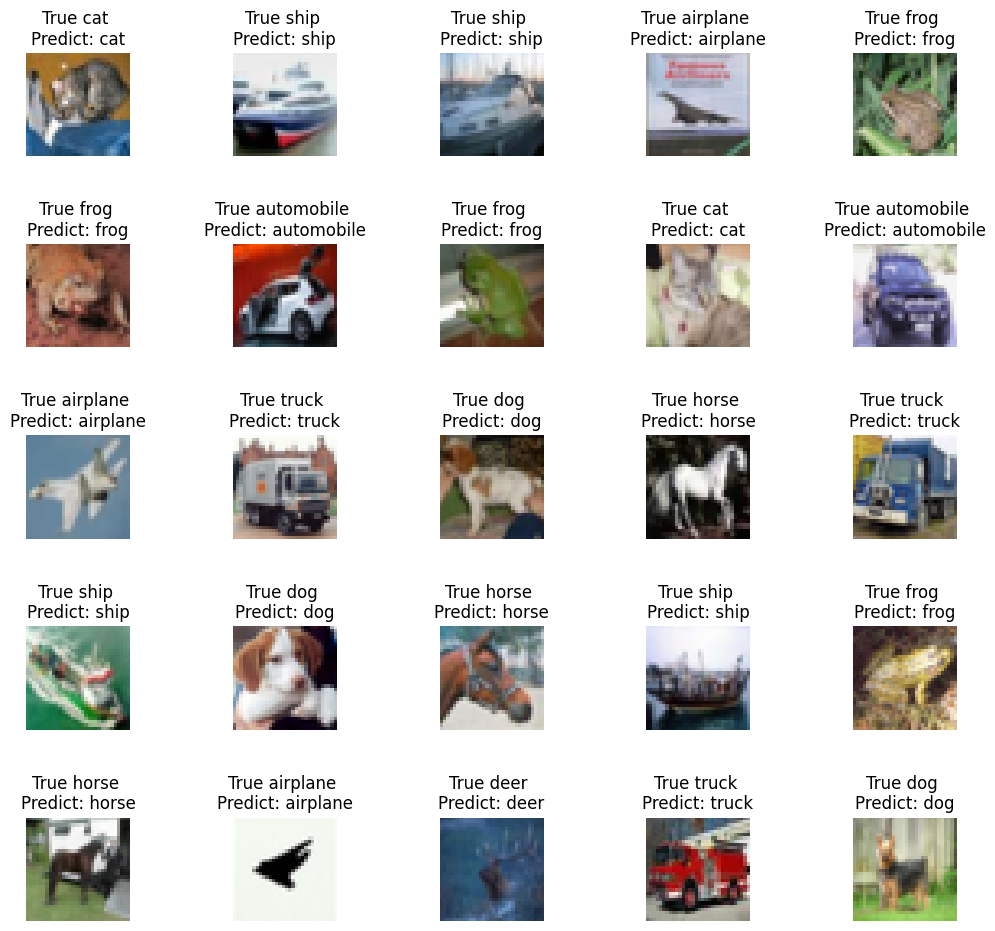

In [26]:
y_pred_classes = np.argmax(y_test, axis=1)

y_true = np.argmax(y_test, axis = 1)

fig, axes = plt.subplots(5,5,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,5*5):
  axes[i].imshow(x_test[i])
  axes[i].set_title ('True %s \nPredict: %s' % (class_names[y_true[i]], class_names[y_pred_classes[i]]))
  axes[i].axis('off')
  plt.subplots_adjust(wspace=1)

## **Loading and Displaying an Image from a URL using OpenCV**

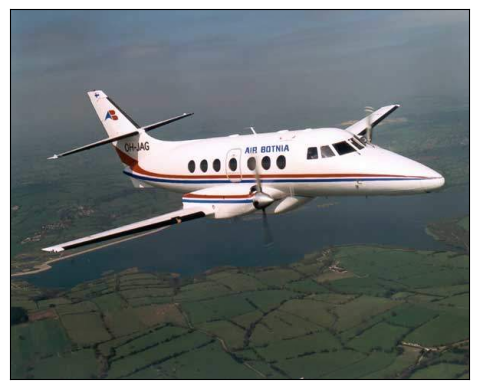

In [27]:
import cv2
import urllib.request
url = 'https://www.aerospace-technology.com/wp-content/uploads/sites/15/2017/10/Jetstream3132_2.jpg'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype='uint8')
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

## **Image Standardization and Reshaping**

In [28]:
mean = np.mean(x_train)
std = np.std(x_train)

image = cv2.resize(image, (32,32))
image = (image-mean)/(std+1e-7)

image = image.reshape((1,32,32,3))

## **Making Predictions**

In [29]:
prediction = model.predict(image)
predicted_class = prediction.argmax()
print('Predicted class', class_names[predicted_class])

1/1 [==============================] - 0s 17ms/step
Predicted class airplane
